In [1]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt

Рассмотрим различные протоколы. Начнём с протокола с $\frac{\lambda}{4}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности

При восстановлении с рангом 3

100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

Mean fidelity: [0.02016937 0.09873851 0.74755911 0.82480866 0.99999998] 	Std fidelity: [4.86462970e-03 5.39461543e-02 1.96508900e-01 1.09621958e-01
 2.63789133e-09]
Mean svx for protocol: [ 1.00000000e+00  9.15976754e-01  2.20268751e-01  1.60547799e-01
 -1.70402971e-09] 	Std s_cvx for protocol: [0.00000000e+00 5.79854068e-02 1.43008081e-01 1.08898572e-01
 1.13446298e-09]


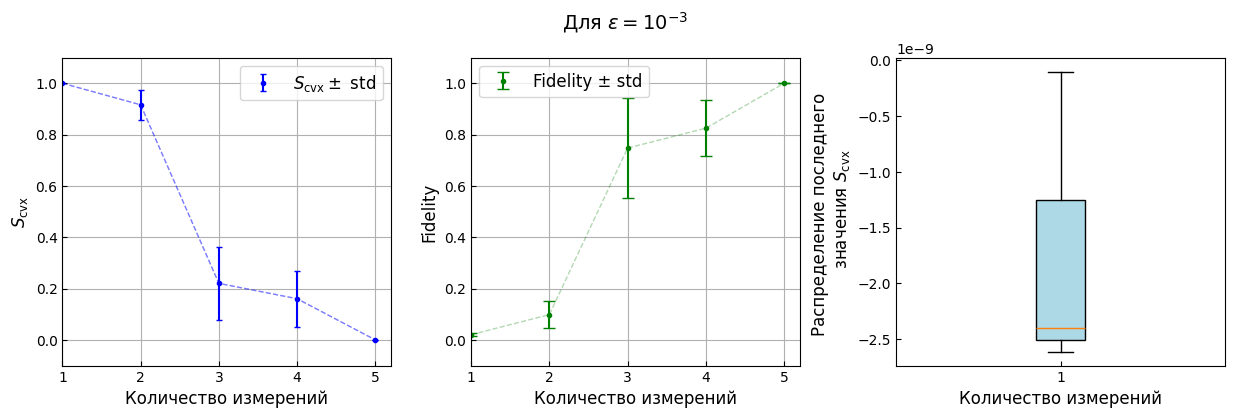

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 12,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4 ,5])
svx_list = []         
fidelity_list = []
N = 500


for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3]),\
                               tomography_1.Fidelity(x_min_list[4], x_max_list[4])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)